In [2]:
import pandas as pd
import numpy as np
from pympler import asizeof
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
# support different types of file
df_1 = pd.read_csv('archive/monroe county car crach 2003-2015.csv', encoding_errors = 'ignore')

In [4]:
(asizeof.asizeof(df_1)/1024)/1024

37.494895935058594

In [5]:
# Creating bins manually
attributes_dict = dict()
for i in df_1.columns:
    attributes_dict[i] = {'count': df_1[i].count(),
                         'null_values': df_1[i].isnull().sum(),
                         'unique_values': df_1[i].drop_duplicates().count()}
    if str(df_1[i].dtype).startswith('int') or str(df_1[i].dtype).startswith('float'):
        attributes_dict[i].update({"mean": df_1[i].mean(), "std": df_1[i].std()})
        if df_1[i].notnull().sum() <= 100:
            bins = 5
        elif df_1[i].notnull().sum() > 100 and df_1[i].notnull().sum() <= 5000:
            bins = 10
        else:
            bins = 20

        bin_size = ( df_1[i].max() - df_1[i].min())/bins
        list_classes = []
        for number in range(bins + 1):
            prev_num = df_1[i].min() + (number*bin_size)
            next_num = df_1[i].min() + (1+(number*bin_size))
            class_id = (prev_num + next_num) / 2 
            if str(df_1[i].dtype).startswith('int'):
                list_classes.append([round(prev_num), round(class_id), round(next_num)])
            else:
                list_classes.append([prev_num, class_id, next_num])
            list_classes = pd.Series(list_classes).drop_duplicates().to_list()

        deletable_series = df_1[i]
        for bin in range(len(list_classes)):
            bin_element = list_classes[bin]
            list_classes[bin].append(deletable_series[(deletable_series>= bin_element[0]) & (deletable_series< bin_element[2])].notnull().sum())
            deletable_series = deletable_series[~((deletable_series>= bin_element[0]) & (deletable_series< bin_element[2]))]

        final_list = []
        for bin_element in list_classes:
            if bin_element[3] > 0:
                final_list.append(bin_element)
        del list_classes
        
        attributes_dict[i].update({"histogram": final_list, "bin_size":bin_size})

        # attributes_dict[i].update({"histogram": list_classes, "bin_size":bin_size})

In [6]:
attributes_dict

{'Year': {'count': 53943,
  'null_values': 0,
  'unique_values': 13,
  'mean': 2008.9680588769627,
  'std': 3.7897595387706904,
  'histogram': [[2003, 2004, 2004, 4625],
   [2004, 2004, 2005, 4269],
   [2005, 2005, 2006, 3967],
   [2006, 2006, 2007, 3937],
   [2007, 2007, 2008, 4055],
   [2008, 2008, 2009, 4341],
   [2009, 2010, 2010, 4014],
   [2010, 2010, 2011, 4060],
   [2011, 2011, 2012, 3914],
   [2012, 2012, 2013, 4223],
   [2013, 2013, 2014, 4058],
   [2014, 2014, 2015, 4167],
   [2015, 2016, 2016, 4313]],
  'bin_size': 0.6},
 'Month': {'count': 53943,
  'null_values': 0,
  'unique_values': 12,
  'mean': 6.6621619116474795,
  'std': 3.5146299812206867,
  'histogram': [[1, 2, 2, 4665],
   [2, 2, 3, 4541],
   [3, 3, 4, 3842],
   [4, 4, 5, 4574],
   [5, 5, 6, 4212],
   [6, 6, 7, 3752],
   [6, 7, 8, 3820],
   [8, 8, 9, 4480],
   [9, 9, 10, 4994],
   [10, 10, 11, 5581],
   [11, 11, 12, 4884],
   [12, 12, 13, 4598]],
  'bin_size': 0.55},
 'Day': {'count': 53943,
  'null_values': 0,
  

In [7]:
hist_data = pd.DataFrame(attributes_dict['Year']['histogram'])
hist_data['range'] = hist_data[0].astype(str) + '-' + hist_data[2].astype(str)
hist_data = hist_data.rename(columns={3:'freq'})

In [8]:
df_1

Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0      2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1      2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2      2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3      2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4      2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   
...     ...    ...  ...      ...     ...            ...                 ...   
53938  2003     10    6  Weekday  1700.0          2-Car   No injury/unknown   
53939  2003     11    3  Weekday   800.0          1-Car   No injury/unknown   
53940  2003     12    5  Weekday  1200.0          2-Car   No injury/unknown   
53941  2003     12    1  Weekend   700.0          2-Car   No injury/unknown   
53942  2003     12    7  Weekend  1700.0          2-Car  Non-incapacitating   

                              Primary Factor      Reported_Location  \
0      OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS   
1                      FOLLOWING TOO CLOSELY          2ND & COLLEGE   
2                  DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD   
3              FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS   
4              FAILURE TO YIELD RIGHT OF WAY                  W 3RD   
...                                      ...                    ...   
53938                    IMPROPER LANE USAGE  DUNN & WHITE LOT WEST   
53939                           UNSAFE SPEED        RED OAK & SR446   
53940             BRAKE FAILURE OR DEFECTIVE        2ND ST & WALNUT   
53941                         UNSAFE BACKING         NINETH & NORTH   
53942  OTHER (DRIVER) - EXPLAIN IN NARRATIVE      MONROW & THIRD ST   

        Latitude  Longitude  
0      39.159207 -86.525874  
1      39.161440 -86.534848  
2      39.149780 -86.568890  
3      39.165655 -86.575956  
4      39.164848 -86.579625  
...          ...        ...  
53938   0.000000   0.000000  
53939   0.000000   0.000000  
53940   0.000000   0.000000  
53941   0.000000   0.000000  
53942   0.000000   0.000000  

[53943 rows x 11 columns]

In [44]:
# Creating histogram using px
attributes_dict = dict()
for i in df_1.columns:
    attributes_dict[i] = {'count': df_1[i].count(),
                         'null_values': df_1[i].isnull().sum(),
                         'unique_values': df_1[i].drop_duplicates().count()}
    if str(df_1[i].dtype).startswith('int') or str(df_1[i].dtype).startswith('float'):
        attributes_dict[i].update({"mean": df_1[i].mean(), "std": df_1[i].std(), 'min':df_1[i].min(), 'max':df_1[i].max()})
        plotly_figure = px.histogram(df_1, x=i, width=300, height=200, template='simple_white', text_auto=True, labels=dict())
        plotly_figure.update_yaxes(visible=False, showticklabels=False).update_xaxes(
        visible=False, showticklabels=False).update_layout(margin=dict(l=0, r=0, t=0, b=0),paper_bgcolor='rgba(0,0,0,0)',
        plot_bgcolor='rgba(0,0,0,0)')
        attributes_dict[i].update({"histogram":plotly_figure})
    else:
        values_counter = df_1[i].value_counts() / df_1[i].notnull().sum()
        values_counter = values_counter.to_frame().reset_index().rename(columns={'count':'value'})
        other_sum = values_counter[values_counter[values_counter.columns[1]] < 0.1][values_counter.columns[1]].sum()
        chart_df = values_counter[values_counter['value'] > 0.1]
        if chart_df.shape[0] != 0:
            if other_sum > 0:
                append_df = pd.DataFrame([['Other Unique Values', other_sum]], columns=[chart_df.columns[0],chart_df.columns[1]])
                chart_df = pd.concat([chart_df, append_df])
            attributes_dict[i].update({"histogram_table": chart_df})
            plotly_figure = px.pie(chart_df, values=chart_df.columns[1], names=chart_df.columns[0], title='He',
                                   template='simple_white',width=300, height=200)
            plotly_figure.update_layout(margin=dict(l=0, r=0, t=0, b=0),paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)')
            attributes_dict[i].update({"histogram":plotly_figure})
        # attributes_dict[i].update({"histogram": list_classes, "bin_size":bin_size})

In [38]:
chart_df

Empty DataFrame
Columns: [Reported_Location, value]
Index: []

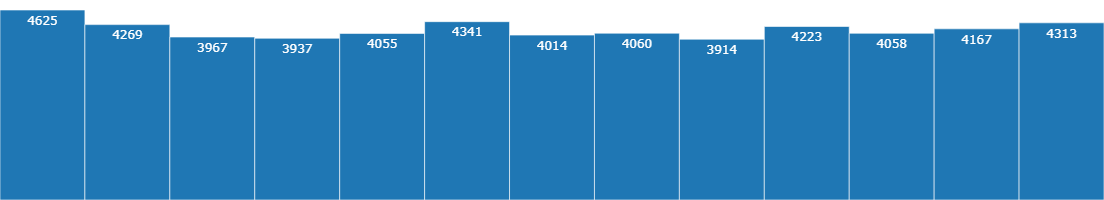

Year


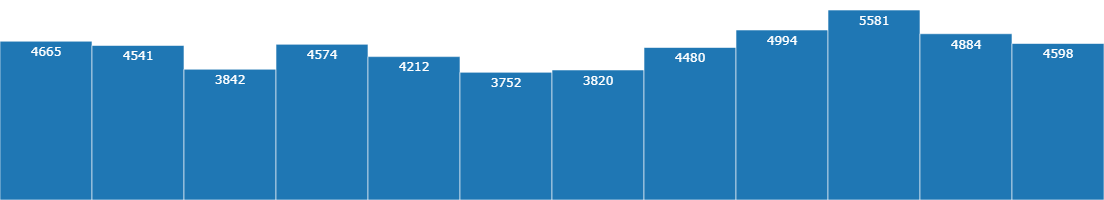

Month


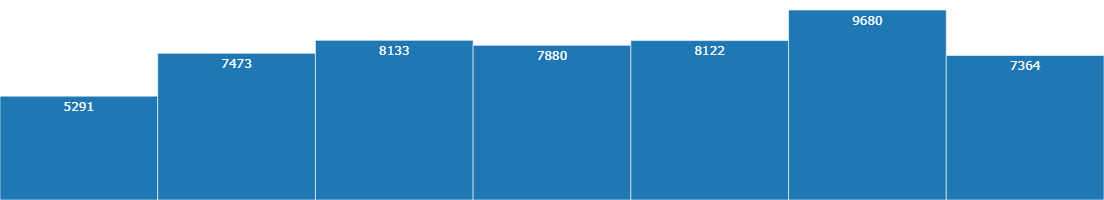

Day


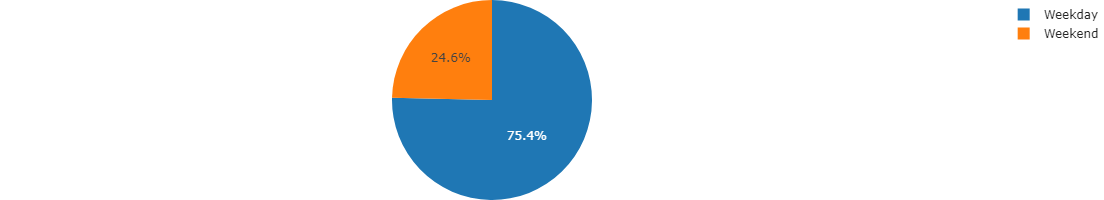

Weekend?


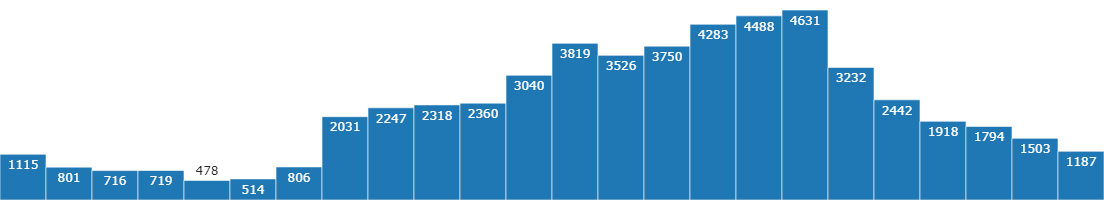

Hour


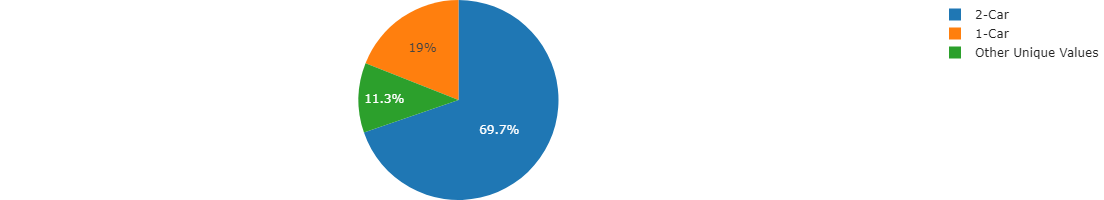

Collision Type


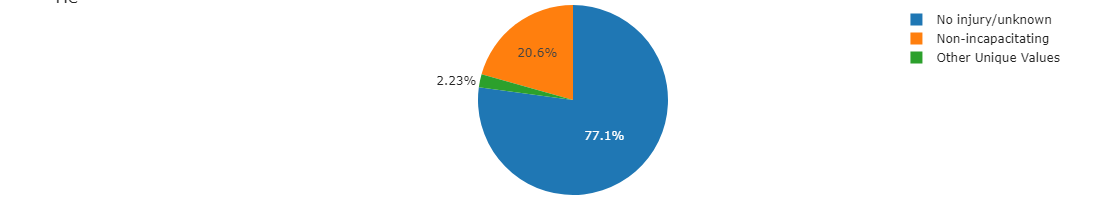

Injury Type


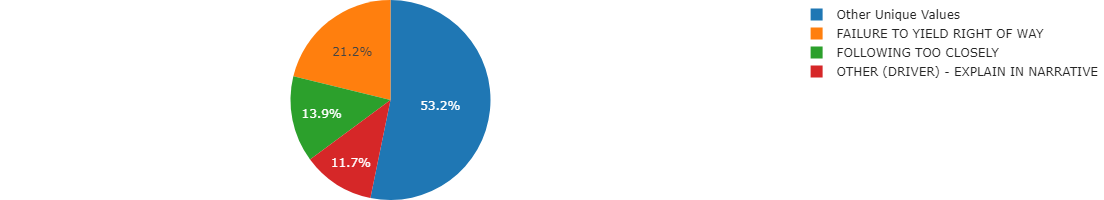

Primary Factor


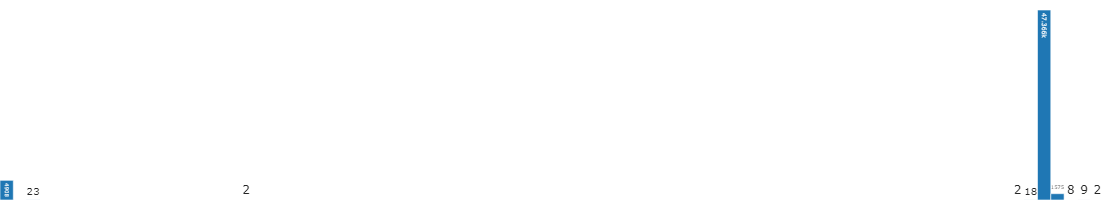

Latitude


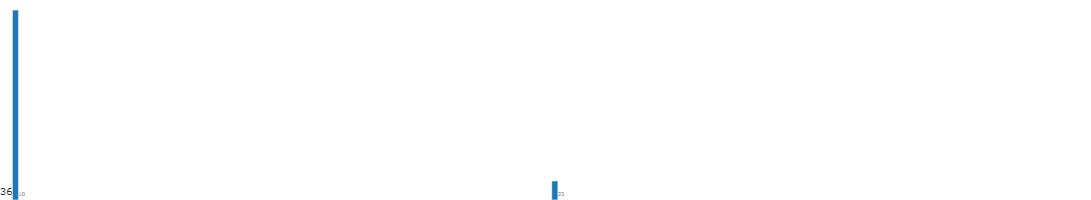

Longitude


In [45]:
for k in attributes_dict.keys():
    try:
        attributes_dict[k]['histogram'].show()
        print(k)
    except Exception:
        continue

# Implementing the pie charts for non numerical data

In [12]:
df_1.Latitude.value_counts()

Latitude
0.000000     4908
39.164240    1424
39.164640     954
39.166640     622
39.164448     427
             ... 
39.222687       1
39.222156       1
39.221638       1
39.221559       1
38.990848       1
Name: count, Length: 15370, dtype: int64

In [22]:
# values_counter[values_counter[values_counter.columns[1]] >= 0.1]

values_counter[values_counter[values_counter.columns[1]] < 0.1][values_counter.columns[1]].sum()

1.0

In [18]:
values_counter[values_counter['value'] > 0.1]

Empty DataFrame
Columns: [Reported_Location, value]
Index: []

In [9]:
values_counter[values_counter[values_counter.columns[1]] < 0.1][values_counter.columns[0]] = 'Other'

In [26]:
for i in attributes_dict.keys():
    try:
        print(attributes_dict[i]['histogram_table'])
        print(i)
    except Exception:
        continue

  Weekend?     value
0  Weekday  0.753671
1  Weekend  0.246329
Weekend?
  Collision Type     value
0          2-Car  0.697221
1          1-Car  0.189944
Collision Type
          Injury Type    value
0   No injury/unknown  0.77124
1  Non-incapacitating  0.20644
Injury Type
                          Primary Factor     value
0          FAILURE TO YIELD RIGHT OF WAY  0.211900
1                  FOLLOWING TOO CLOSELY  0.139317
2  OTHER (DRIVER) - EXPLAIN IN NARRATIVE  0.116580
Primary Factor


In [32]:
values_counter.to_frame().reset_index().columns[0]

'Weekend?'

In [12]:
import pathlib
import sys

# This adds the path of the …/src folder
# to the PYTHONPATH variable
sys.path.append(str(pathlib.Path().absolute()).split("/src")[0] + "/src")

In [13]:
str(pathlib.Path().absolute()).split("/src")[0] + "/src"

'C:\\Users\\c0932238\\Documents\\test-portfolio/src'

In [14]:
type(dict(test='test').get('test2'))

NoneType

In [15]:
df_1.dtypes

Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

In [16]:
import random
colors_list = ['indianred', 'yellow']
[random.choice(colors_list)]

['yellow']

In [46]:
c = float(input("Celcius Degrees"))
f = (c * (9/5)) + 32
print(f)

Celcius Degrees 5


41.0


In [45]:
f = float(input("Farenheit Degrees"))
c = 5/9 * (f-32)
print(c)

Farenheit Degrees 41


5.0
